In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from keras.models import Sequential # try tensorflow.keras.models in case of import error
from keras.layers import Dense # try tensorflow.keras.layers in case of import error

In [2]:
# import training/testing dataset

training_df = pd.read_csv(Path("Resources/training_dataset.csv"))
testing_df = pd.read_csv(Path("Resources/testing_dataset.csv"))

In [3]:
# split training dataset to X and y

X_train = training_df.drop(columns="status")
y_train = training_df["status"]
display(X_train.tail())
display(y_train[-5:])

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
97117,-0.219329,-0.190852,-0.203749,-0.182927,-0.186612,-0.058265,-0.209514,-0.165374,-0.206793,-0.227825,-0.243471,-0.153940,-0.202192,-0.213059,-0.052323,-0.206793,-0.235422,-0.200938
97118,-0.222145,-0.179354,-0.199686,-0.178509,-0.188863,-0.055773,-0.211300,-0.166231,-0.198073,-0.225505,-0.240593,-0.149817,-0.201842,-0.209004,-0.045610,-0.198073,-0.232546,-0.191834
97119,-0.192159,-0.181999,-0.191512,-0.154783,-0.172297,-0.032896,-0.190382,-0.125739,-0.194009,-0.213523,-0.244265,-0.121229,-0.182718,-0.208669,-0.029677,-0.194009,-0.232920,-0.191740
97120,-0.221384,-0.189409,-0.203366,-0.180540,-0.186663,-0.055358,-0.210573,-0.166003,-0.205510,-0.227741,-0.243266,-0.150856,-0.201552,-0.211046,-0.050811,-0.205510,-0.234552,-0.199931
97121,-0.223063,-0.191623,-0.204462,-0.182680,-0.189377,-0.058271,-0.212217,-0.166133,-0.208150,-0.228994,-0.244249,-0.153265,-0.204662,-0.210942,-0.049798,-0.208150,-0.235025,-0.202535


97117    1
97118    1
97119    1
97120    1
97121    1
Name: status, dtype: int64

In [4]:
# split testing dataset to X and y

X_test = testing_df.drop(columns="status")
y_test = testing_df["status"]
display(X_test.tail())
display(y_test[-5:])

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
19666,-0.215226,-0.164916,-0.194334,-0.181122,-0.181608,-0.094862,-0.208887,-0.175621,-0.182696,-0.225049,-0.236255,-0.163658,-0.193834,-0.199539,-0.105437,-0.182696,-0.226363,-0.175619
19667,-0.212986,-0.165046,-0.194220,-0.184832,-0.185888,-0.103520,-0.210132,-0.175893,-0.182165,-0.224273,-0.229114,-0.168517,-0.191778,-0.200033,-0.406323,-0.182165,-0.223765,-0.174307
19668,-0.210084,-0.161478,-0.193038,-0.182268,-0.162754,-0.098553,-0.216656,-0.172556,-0.178827,-0.223939,-0.236561,-0.165623,-0.189595,-0.205375,-0.102255,-0.178827,-0.228833,-0.170958
19669,-0.198817,-0.084905,-0.122853,-0.142938,-0.144338,-0.087156,-0.208782,-0.158340,-0.112154,-0.171970,-0.178470,-0.140385,-0.158953,-0.172050,-0.057595,-0.112154,-0.185918,-0.101810
19670,-0.200724,-0.063058,-0.087832,-0.115193,-0.159361,-0.063184,-0.210541,-0.141537,-0.091192,-0.141662,-0.144627,-0.117248,-0.143870,-0.169791,-0.019760,-0.091192,-0.161145,-0.082975


19666    0
19667    0
19668    0
19669    0
19670    0
Name: status, dtype: int64

# Sequential Model

In [5]:
# set instance

neural_network_1 = Sequential()


In [8]:
# set parameters for neural network model

number_input_features = len(X_train.columns)
number_output = 1
hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 8


In [9]:
# set first hidden layers
neural_network_1.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))

# set second hidden layers
neural_network_1.add(Dense(units=hidden_nodes_layer2, activation='tanh'))

# output layer
neural_network_1.add(Dense(units=number_output, activation='sigmoid'))

# display summary
neural_network_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile the model
neural_network_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Fit the model using 100 epochs and the training data
with tf.device('cpu:0'):
    neural_network_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4618 - accuracy: 0.7681
Epoch 2/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4617 - accuracy: 0.7661
Epoch 3/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4612 - accuracy: 0.7679
Epoch 4/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4607 - accuracy: 0.7687
Epoch 5/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4611 - accuracy: 0.7667
Epoch 6/100
3036/3036 [==============================] - 11s 3ms/step - loss: 0.4600 - accuracy: 0.7686
Epoch 7/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4611 - accuracy: 0.7671
Epoch 8/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4597 - accuracy: 0.7695
Epoch 9/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.4597 - accuracy: 0.7682
Epoch 10/100
3036/3036 [==============================] - 10s 3m

In [46]:
# save trained model
neural_network_1.save("Resources/neural_network_models/model_1.h5")

615/615 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.31      0.47     18417
           1       0.08      0.92      0.15      1254

    accuracy                           0.35     19671
   macro avg       0.53      0.61      0.31     19671
weighted avg       0.93      0.35      0.45     19671



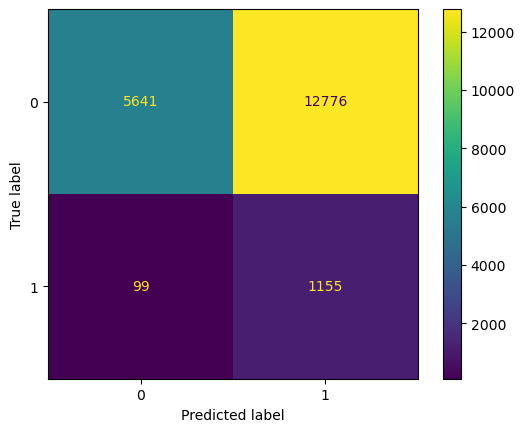

In [60]:
# make prediction and print classification report
y_pred_1 = neural_network_1.predict(X_test)
y_pred_1 = np.where(y_pred_1 < 0.5, 0, 1)


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred_1))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_1)).plot()
plt.show()

### Analysis

First of all, the result of this neural network model is too strict.
It has very low precision on category 1 (failed - bankrupt), and just by looking at the confusion matrix, the model estimated too many category 0 (alive) as category 1.

This might be sign of overfitting

# Try different configuration

In [73]:
# create instance
neural_network_2 = Sequential()

# define parameters
number_input_features = len(X_train.columns)
number_output = 1
hidden_nodes_layer1 = 9

# set a hidden layers
neural_network_2.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))

# output layer
neural_network_2.add(Dense(units=number_output, activation='sigmoid'))

# display summary
neural_network_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 171       
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [74]:
# compile the model
neural_network_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
with tf.device('cpu:0'):
    neural_network_2.fit(X_train, y_train, epochs=100)

# save the model
neural_network_2.save("Resources/neural_network_models/model_2.h5")

Epoch 1/100
3036/3036 [==============================] - 10s 3ms/step - loss: 0.6420 - accuracy: 0.6260
Epoch 2/100
3036/3036 [==============================] - 9s 3ms/step - loss: 0.6197 - accuracy: 0.6436
Epoch 3/100
3036/3036 [==============================] - 8s 3ms/step - loss: 0.6122 - accuracy: 0.6491
Epoch 4/100
3036/3036 [==============================] - 8s 3ms/step - loss: 0.6078 - accuracy: 0.6523
Epoch 5/100
3036/3036 [==============================] - 8s 3ms/step - loss: 0.6047 - accuracy: 0.6556
Epoch 6/100
3036/3036 [==============================] - 9s 3ms/step - loss: 0.6023 - accuracy: 0.6566
Epoch 7/100
3036/3036 [==============================] - 8s 3ms/step - loss: 0.6007 - accuracy: 0.6581
Epoch 8/100
3036/3036 [==============================] - 8s 3ms/step - loss: 0.5993 - accuracy: 0.6596
Epoch 9/100
3036/3036 [==============================] - 8s 3ms/step - loss: 0.5979 - accuracy: 0.6616
Epoch 10/100
3036/3036 [==============================] - 9s 3ms/step - 

615/615 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.19      0.32     18417
           1       0.08      0.96      0.14      1254

    accuracy                           0.24     19671
   macro avg       0.53      0.58      0.23     19671
weighted avg       0.93      0.24      0.31     19671



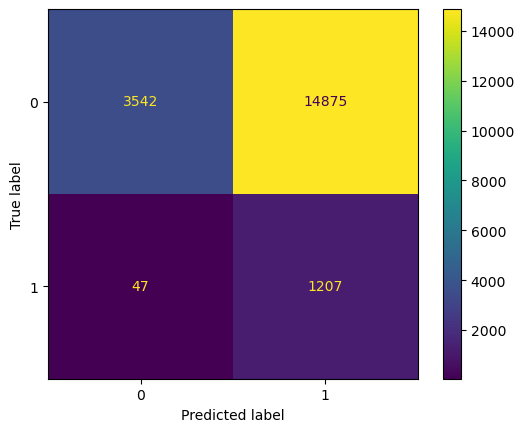

In [80]:
# make prediction and print classification report
y_pred_2 = neural_network_2.predict(X_test)
y_pred_2 = np.where(y_pred_2 < 0.5, 0, 1)

print(classification_report(y_test, y_pred_2))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_2)).plot()
plt.show()

### Analysis

This modification did not work very well. Similar results occured.

Next, try with undersampled training data

# Undersampled training dataset

Use regression model, and optimize classification threshold

In [83]:
# Load saved undersampled csv

undersampled_df = pd.read_csv(Path("Resources/training_dataset_undersampled.csv"))
X_train_undersampled = undersampled_df.drop(columns="status")
y_train_undersampled = undersampled_df["status"]
display(X_train_undersampled.tail())
display(y_train_undersampled[-5:])

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
7927,-0.153795,0.118212,-0.202381,-0.175465,-0.161667,-0.044832,-0.078787,-0.154728,0.002255,-0.219746,-0.243072,-0.145222,-0.200866,-0.155924,-0.027064,0.002255,-0.213443,0.046111
7928,-0.200482,-0.227433,-0.212039,-0.183550,-0.158723,-0.047504,-0.199939,-0.158431,-0.245379,-0.236156,-0.244376,-0.151753,-0.202252,-0.213860,-0.034737,-0.245379,-0.233472,-0.241978
7929,-0.126105,-0.170419,-0.196139,-0.177499,-0.012931,-0.054020,-0.130772,-0.148183,-0.177872,-0.192611,-0.204394,-0.151096,-0.136910,-0.190274,-0.019492,-0.177872,-0.203239,-0.164396
7930,-0.201376,-0.251226,-0.214017,-0.191786,-0.169212,-0.060714,-0.230600,-0.156872,-0.263694,-0.238057,-0.247364,-0.162239,-0.205445,-0.228312,-0.376521,-0.263694,-0.239328,-0.261393
7931,1.369464,2.010218,0.874402,1.057622,1.788694,0.598744,2.362780,0.214031,1.800018,0.966641,0.774390,1.043904,0.886856,1.680658,0.593916,1.800018,1.042309,1.846629


7927    1
7928    1
7929    1
7930    1
7931    1
Name: status, dtype: int64

In [88]:
# configure neural network model

neural_network_3 = Sequential()

number_input_features = len(X_train_undersampled.columns)
number_output = 1
hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 8


neural_network_3.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))
neural_network_3.add(Dense(units=hidden_nodes_layer2, activation='relu'))
neural_network_3.add(Dense(units=number_output, activation='linear'))

neural_network_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                608       
                                                                 
 dense_12 (Dense)            (None, 8)                 264       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [91]:
# compile the model
neural_network_3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# fit the model
with tf.device('cpu:0'):
    neural_network_3.fit(X_train, y_train, epochs=32)

# save the model
neural_network_3.save("Resources/neural_network_models/model_3.h5")

Epoch 1/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.2323 - mse: 0.2323
Epoch 2/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.2106 - mse: 0.2106
Epoch 3/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.2049 - mse: 0.2049
Epoch 4/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.2004 - mse: 0.2004
Epoch 5/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.1960 - mse: 0.1960
Epoch 6/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.1927 - mse: 0.1927
Epoch 7/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.1900 - mse: 0.1900
Epoch 8/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.1881 - mse: 0.1881
Epoch 9/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.1859 - mse: 0.1859
Epoch 10/32
3036/3036 [==============================] - 10s 3ms/step - loss: 0.1853 - mse: 0.1853
Epoch 11/32
3036/30

In [139]:
# make prediction and print classification report
y_pred_3 = neural_network_3.predict(X_test)

615/615 [==============================] - 1s 2ms/step


In [140]:
pred_df = pd.concat([y_test, pd.Series(y_pred_3[:, 0])], axis=1)
pred_df.columns = ['true', 'pred']
describe = pred_df.describe()

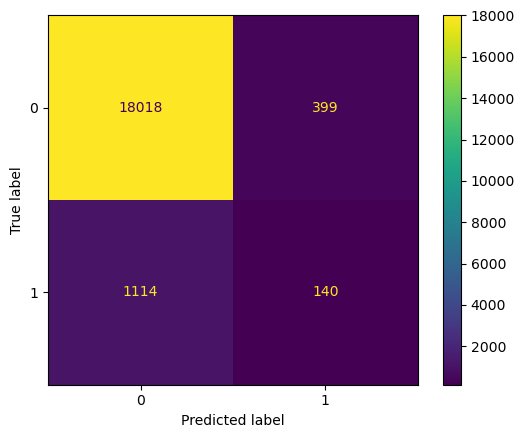

In [141]:
y_pred_3 = np.where(y_pred_3 < (describe.loc['mean', 'pred'] + describe.loc['std', 'pred']), 0 ,1)
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_3)).plot()
plt.show()

In [142]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18417
           1       0.26      0.11      0.16      1254

    accuracy                           0.92     19671
   macro avg       0.60      0.54      0.56     19671
weighted avg       0.90      0.92      0.91     19671

